In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
paris_rev = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Paris_reviews.csv',
                   encoding='utf8')
#paris_rev.comments.value_counts()

In [3]:
paris = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Paris (December 2015).csv',
                   encoding='utf8')

In [4]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41761 entries, 0 to 41760
Data columns (total 16 columns):
Unnamed: 0              41761 non-null int64
room_id                 41761 non-null int64
host_id                 41489 non-null float64
room_type               41489 non-null object
borough                 0 non-null float64
neighborhood            41761 non-null object
reviews                 41761 non-null int64
overall_satisfaction    30117 non-null float64
accommodates            37792 non-null float64
bedrooms                41268 non-null float64
bathrooms               39064 non-null float64
price                   41761 non-null float64
minstay                 40917 non-null float64
latitude                41761 non-null float64
longitude               41761 non-null float64
collected               41761 non-null object
dtypes: float64(10), int64(3), object(3)
memory usage: 5.1+ MB


In [5]:
paris = paris.drop('borough', axis=1)

In [6]:
paris.neighborhood.unique()

array([u'Notre-Dame-des-Champs', u'Sorbonne', u'Plaisance',
       u'Folie-M\ufffdricourt', u'Arts-et-Metiers', u'Grenelle',
       u'Notre-Dame', u'Saint-Georges', u'Saint-Merri',
       u'Faubourg-Montmartre', u'Saint-Avoye', u'Sainte-Marguerite',
       u'P\ufffdre-Lachaise', u'Villette', u'Saint-Ambroise',
       u'Clignancourt', u'Europe', u'Ternes', u'Enfants-Rouges',
       u'Saint-Victor', u'H\ufffdpital-Saint-Louis', u'Rochechouart',
       u'Necker', u'Gare', u'Roquette', u'Salp\ufffdtri\ufffdre',
       u'Grandes-Carri\ufffdres', u'Porte-Saint-Martin', u'Combat',
       u'Maison-Blanche', u'Saint-Gervais', u'Bonne-Nouvelle',
       u'Belleville', u'Pont-de-Flandre', u'Madeleine', u'Halles',
       u'Goutte-dOr', u'St-Germain-lAuxerrois', u'Val-de-Grace',
       u'Invalides', u'Jardin-des-Plantes', u'Bel-Air', u'Charonne',
       u'Am\ufffdrique', u'Batignolles', u'Odeon', u'Epinettes',
       u'Porte-Dauphine', u'Saint-Vincent-de-Paul', u'Gros-Caillou',
       u'Quinze-Vingt

In [7]:
paris.neighborhood.replace(u'Folie-M\ufffdricourt',u'Folie-Mericourt',inplace=True)
paris.neighborhood.replace(u'P\ufffdre-Lachaise',u'Pere-Lachaise',inplace=True)
paris.neighborhood.replace(u'H\ufffdpital-Saint-Louis',u'Hopital-Saint-Louis',inplace=True)
paris.neighborhood.replace(u'Salp\ufffdtri\ufffdre',u'Salpetriere',inplace=True)
paris.neighborhood.replace(u'Grandes-Carri\ufffdres',u'Grandes-Carrieres',inplace=True)
paris.neighborhood.replace(u'Am\ufffdrique',u'Amerique',inplace=True)
paris.neighborhood.replace(u'Saint-Germain-des-Pr\ufffds',u'Saint-Germain-des-Pres',inplace=True)
paris.neighborhood.replace(u'Chauss\ufffde-dAntin',u'Chaussee-dAntin',inplace=True)
paris.neighborhood.replace(u'Champs-Elys\ufffdes',u'Champs-Elysees',inplace=True)
paris.neighborhood.replace(u'Place-Vend\ufffdme',u'Place-Vendome',inplace=True)

In [8]:
paris.head()

Unnamed: 0  room_id  host_id        room_type           neighborhood  \
0           0     2525   2771.0  Entire home/apt  Notre-Dame-des-Champs   
1           1     2623   2883.0     Private room               Sorbonne   
2           2     3109   3631.0  Entire home/apt              Plaisance   
3           3     4886   6792.0  Entire home/apt        Folie-Mericourt   
4           4     4890   6792.0  Entire home/apt        Arts-et-Metiers   

   reviews  overall_satisfaction  accommodates  bedrooms  bathrooms  price  \
0       17                   4.5           1.0       0.0        1.0   76.0   
1       61                   4.0           2.0       1.0        1.0  122.0   
2        0                   NaN           2.0       1.0        1.0   95.0   
3        9                   4.5           2.0       0.0        1.0  100.0   
4       10                   4.5           4.0       1.0        1.0  202.0   

   minstay   latitude  longitude                   collected  
0      6.0  48.849054   2.331454  2016-01-01 21:23:11.210689  
1      1.0  48.852169   2.347332  2016-01-01 15:23:42.226951  
2      2.0  48.833494   2.318518  2016-01-01 16:01:35.286433  
3      3.0  48.865283   2.371150  2016-01-01 05:34:51.122949  
4      3.0  48.864090   2.356515  2015-12-31 07:57:00.485928

In [9]:
paris = paris[paris['host_id'].notnull()]

In [394]:
paris.accommodates.isnull().sum()

3697

In [10]:
paris.room_type.value_counts()

Entire home/apt    35500
Private room        5549
Shared room          440
Name: room_type, dtype: int64

In [11]:
#paris.neighborhood.value_counts()

In [12]:
paris.shape

(41489, 15)

In [13]:
import numpy as np

In [14]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(paris.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [15]:
df1 = df1.reset_index(level = 0)

In [16]:
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [17]:
df1

neighborhood  reviews  host_id       price
14            Clignancourt    27162     1944   97.488169
27       Grandes-Carrieres    20941     1372  106.479592
60                Roquette    15270     1107  101.268293
67           Saint-Lambert     7986     1013   94.446199
28                Grenelle    11260      970  120.843299
23         Folie-Mericourt    12720      824   98.950243
4                  Auteuil     5000      776  117.974227
42                  Necker     7674      770  107.396104
61          Saint-Ambroise    10899      766   99.353786
9           Bonne-Nouvelle    13482      765  127.811765
72       Sainte-Marguerite     8816      749   96.285714
76                  Ternes     7590      738  127.521680
5              Batignolles     6648      728   99.791209
57      Porte-Saint-Martin    12080      715  106.780420
64           Saint-Georges     8232      714  120.830532
19               Epinettes     5871      698   89.070201
31     Hopital-Saint-Louis     9260      671   90.019374
56       Porte-Saint-Denis     9217      661  115.780635
15                  Combat     6058      661   85.515885
41                  Muette     5826      661  154.532526
29            Gros-Caillou     9800      659  163.295903
59            Rochechouart     8077      657  107.085236
50                  Picpus     5466      653   85.630934
78                Villette     5960      646   76.619195
48           Pere-Lachaise     5700      639   80.558685
71   Saint-Vincent-de-Paul     8049      638   94.496865
66           Saint-Gervais    16149      612  151.934641
53               Plaisance     5067      608   95.680921
7               Belleville     5860      605   79.680992
34             Javel 15Art     4404      601   99.237937
..                     ...      ...      ...         ...
39                 Monnaie     8160      403  174.069479
22       Faubourg-du-Roule     4076      391  203.086957
2                  Arsenal     7145      386  156.284974
33      Jardin-des-Plantes     5008      384  119.635417
70            Saint-Victor     6961      379  142.197889
21     Faubourg-Montmartre     4854      378  133.224868
40            Montparnasse     3461      358  111.184358
55          Porte-Dauphine     3418      345  176.513043
69     Saint-Thomas-dAquin     5431      337  187.979228
45                   Odeon     6123      333  194.216216
35             La Chapelle     3306      332   76.524096
63           Saint-Fargeau     2943      325   74.433846
6                  Bel-Air     1918      286   79.066434
16             Croulebarbe     2859      282  104.421986
43              Notre-Dame     4880      281  220.964413
54         Pont-de-Flandre     2108      276   75.612319
36               Madeleine     3969      243  182.909465
17         Ecole-Militaire     2346      237  141.215190
65  Saint-Germain-des-Pres     4704      229  185.899563
73             Salpetriere     2571      219   88.493151
11          Champs-Elysees     2623      218  255.678899
46            Palais-Royal     2789      205  166.936585
13         Chaussee-dAntin     3158      186  142.365591
75   St-Germain-lAuxerrois     3916      182  173.543956
47      Parc-de-Montsouris     1452      176   99.011364
79                Vivienne     2757      163  150.515337
32               Invalides     2430      162  193.500000
8                    Bercy     2080      138   82.115942
51           Place-Vendome     2009      136  189.772059
24                 Gaillon     1888      105  175.580952

[80 rows x 4 columns]

In [18]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [19]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

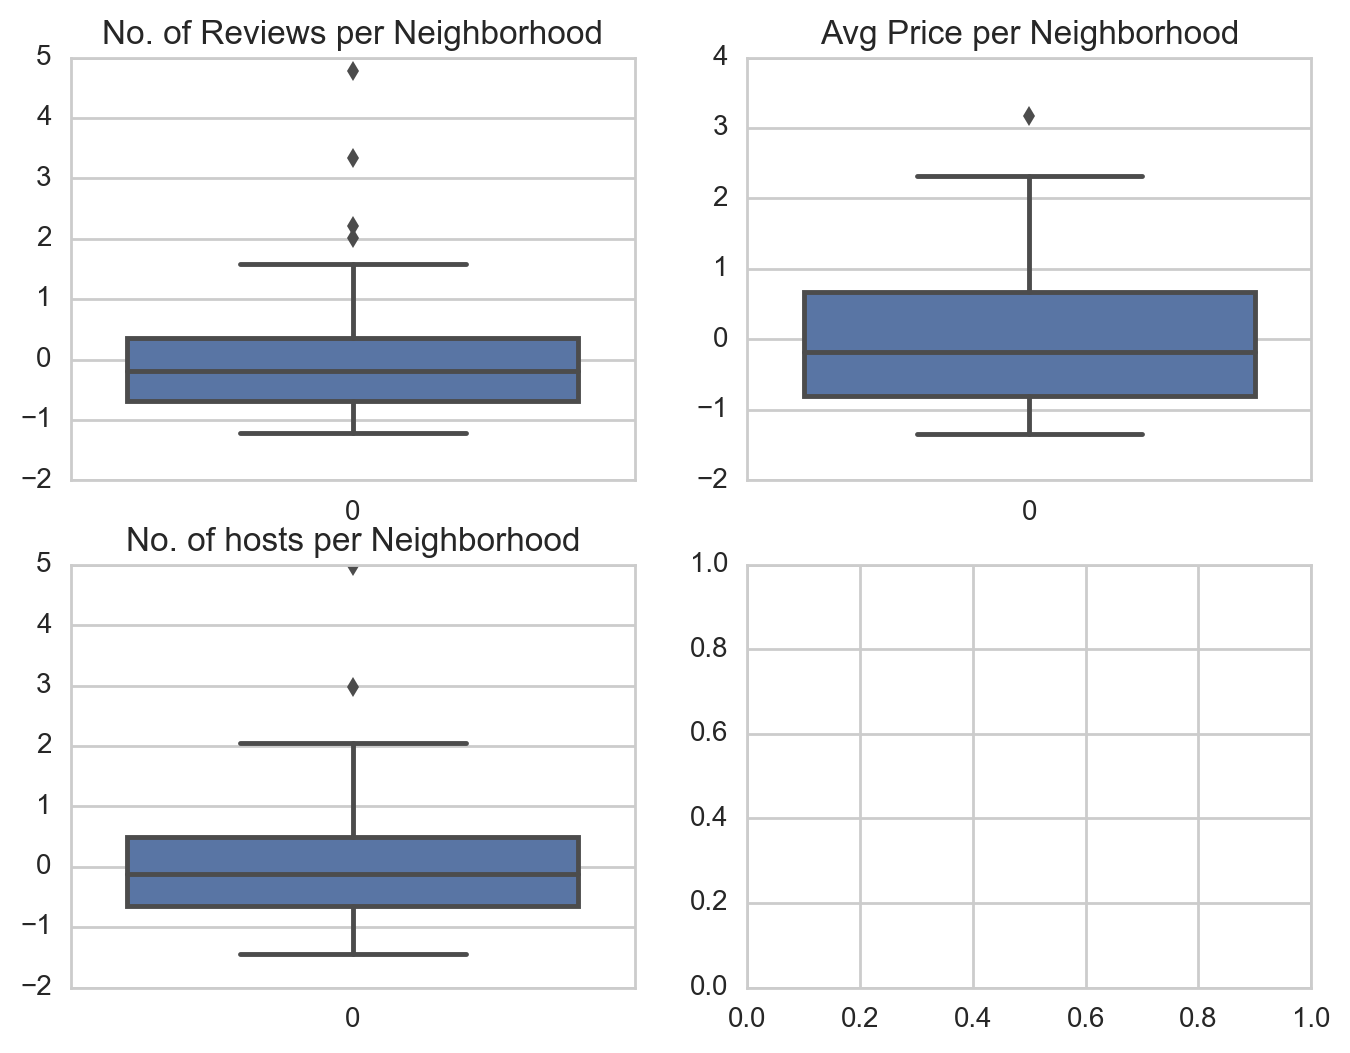

In [20]:
fig, axis_array = plt.subplots(2,2, figsize=(8,6)) # figure with one row and 2 columns within fig. Subplots
axis1 = axis_array[0][0]
axis2 = axis_array[0][1]
axis3 = axis_array[1][0]

axis1 = sns.boxplot(data = df1.reviews, ax=axis1)
axis2 = sns.boxplot(data = df1.price, ax=axis2)
axis3 = sns.boxplot(data = df1.host_id, ax=axis3)


#axis1.set_xlim(low-1, high+1)
#axis1.set_xlabel('Outcome', fontsize=16)
#axis1.set_ylabel('Number of Reviews ', fontsize=8)
#axis1.vlines(x, 0, dist.pmf(x), colors='darkred', lw=8, alpha=0.8) # plots vertical lines
#axis1.set_ylim(0, max(dist.pmf(x))+0.03)
    

axis1.set_title('No. of Reviews per Neighborhood', fontsize=12)
axis2.set_title('Avg Price per Neighborhood', fontsize=12)
axis3.set_title('No. of hosts per Neighborhood', fontsize=12)


plt.show()

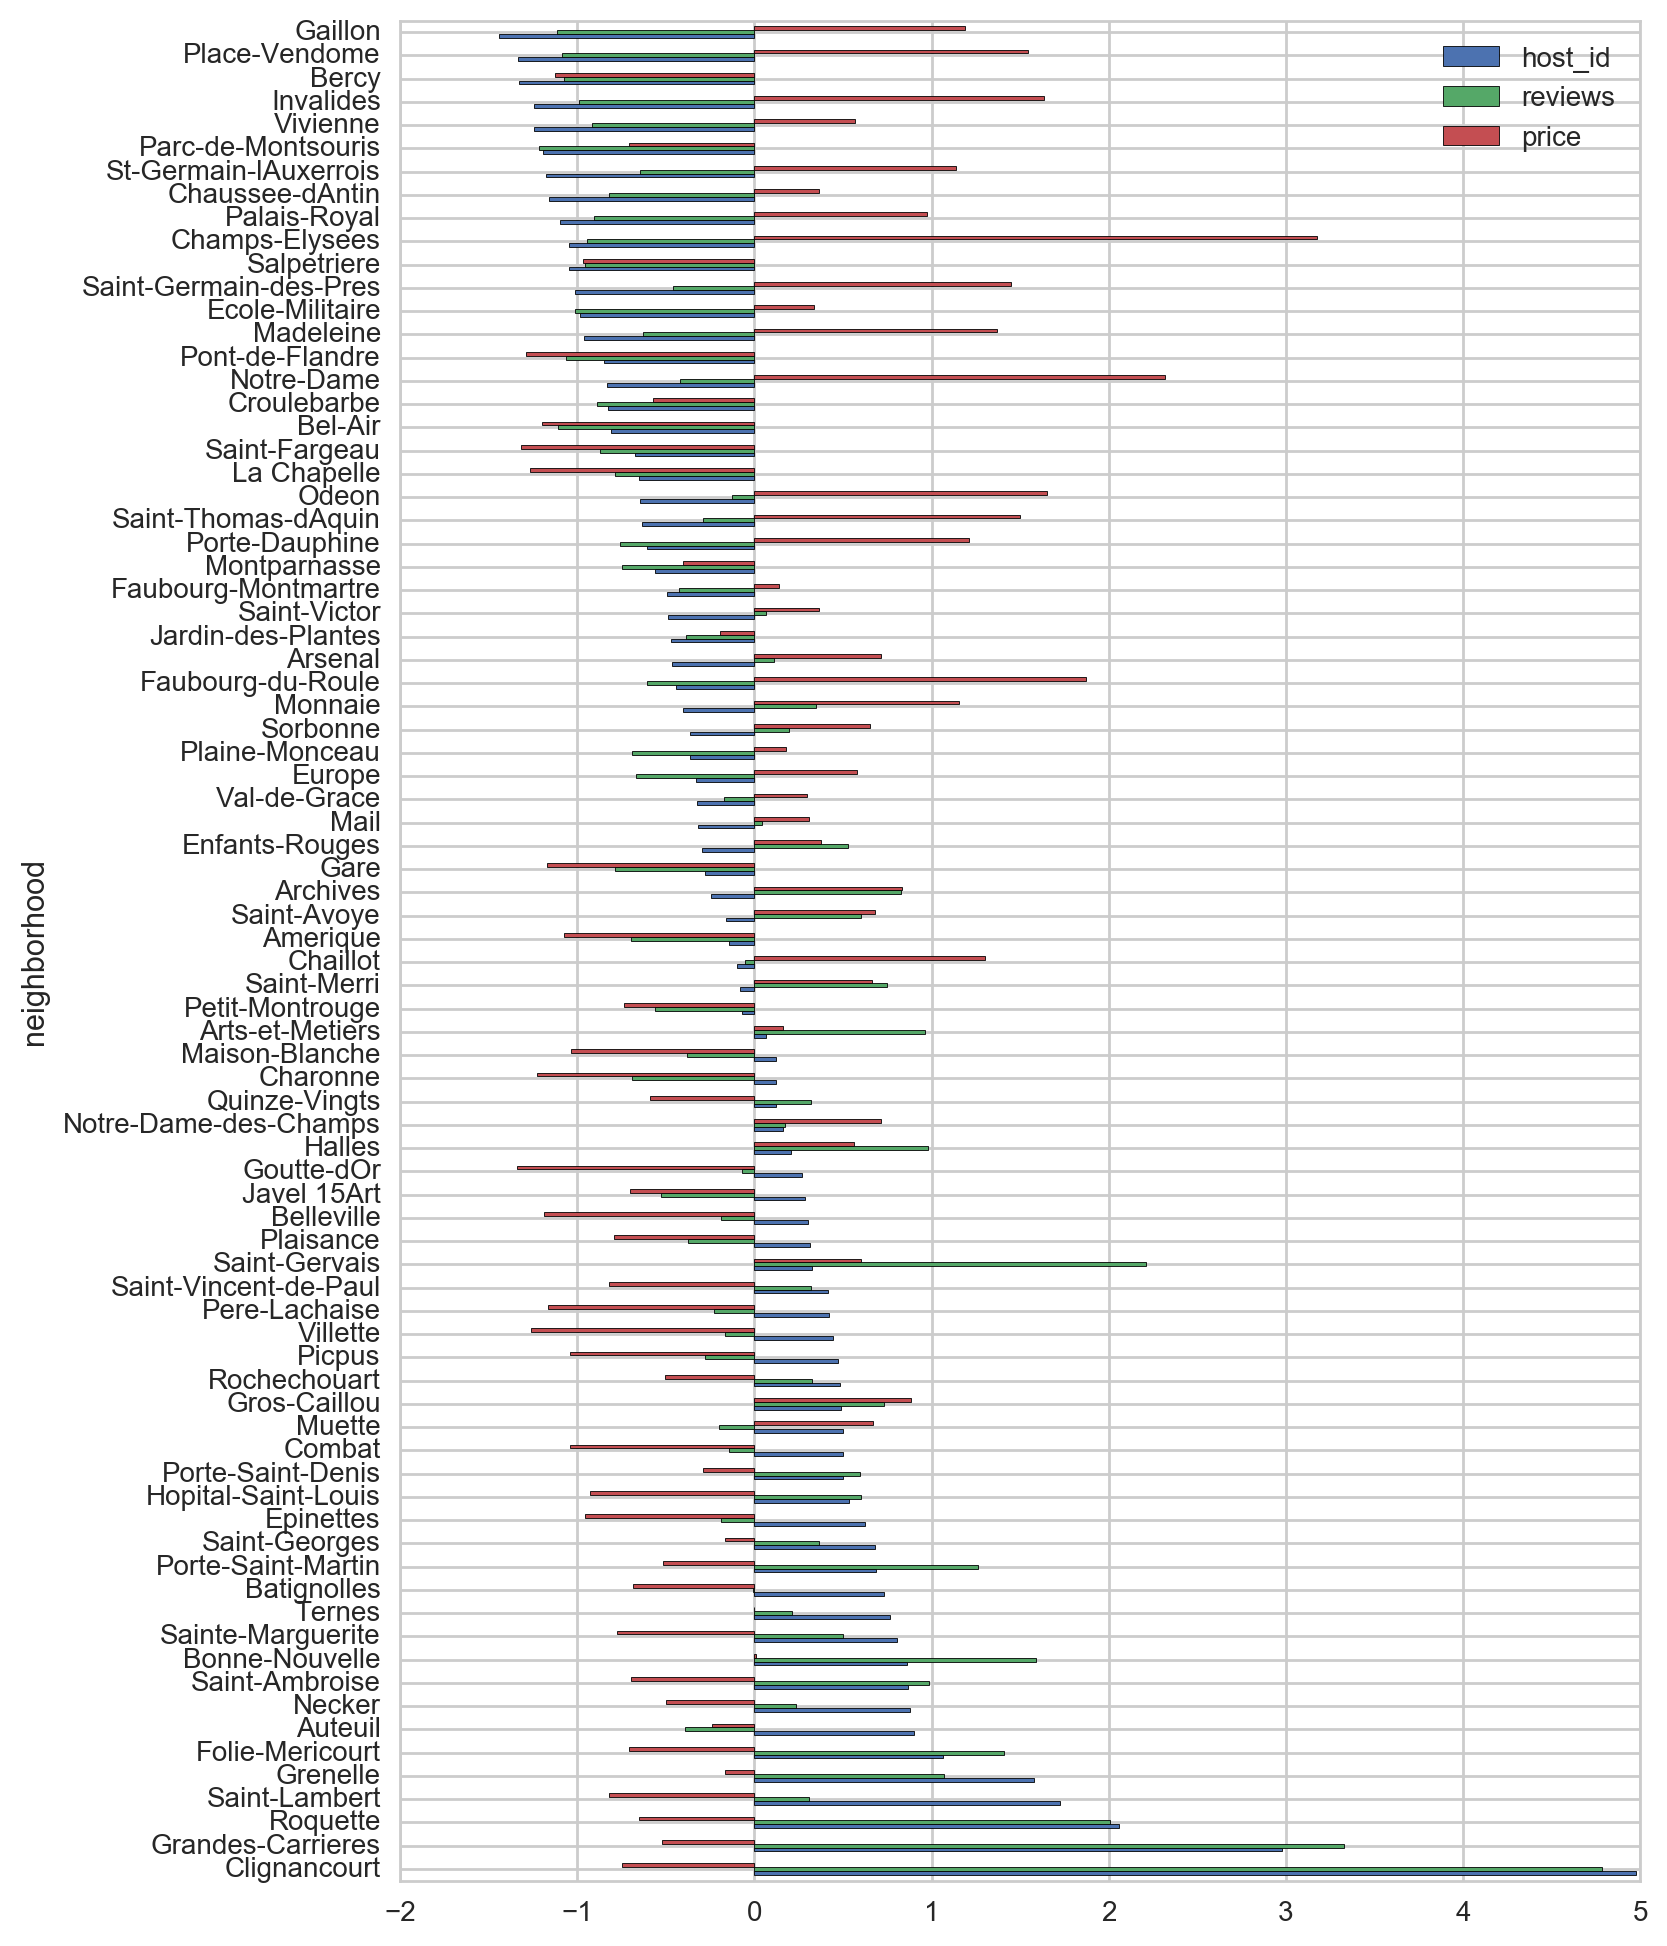

In [21]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [22]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(paris.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [23]:
df2.head()

reviews  host_id       price
neighborhood room_type                                    
Amerique     Entire home/apt     2901      363   95.019284
             Private room         669      103   51.708738
             Shared room          112       12   37.750000
Archives     Entire home/apt     9750      414  168.154589
             Private room         443       30   75.133333

In [24]:
df2.reset_index(level=0, inplace=True)

In [25]:
df2.reset_index(inplace=True)

In [26]:
df2.head()

room_type neighborhood  reviews  host_id       price
0  Entire home/apt     Amerique     2901      363   95.019284
1     Private room     Amerique      669      103   51.708738
2      Shared room     Amerique      112       12   37.750000
3  Entire home/apt     Archives     9750      414  168.154589
4     Private room     Archives      443       30   75.133333

In [27]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

In [28]:
df2.head()

room_type neighborhood   reviews   host_id     price
0  Entire home/apt     Amerique  0.179842  0.767467  0.179064
1     Private room     Amerique -0.468545 -0.307089 -0.756067
2      Shared room     Amerique -0.630351 -0.683184 -1.057455
3  Entire home/apt     Archives  2.169447  0.978246  1.758151
4     Private room     Archives -0.534197 -0.608792 -0.250300

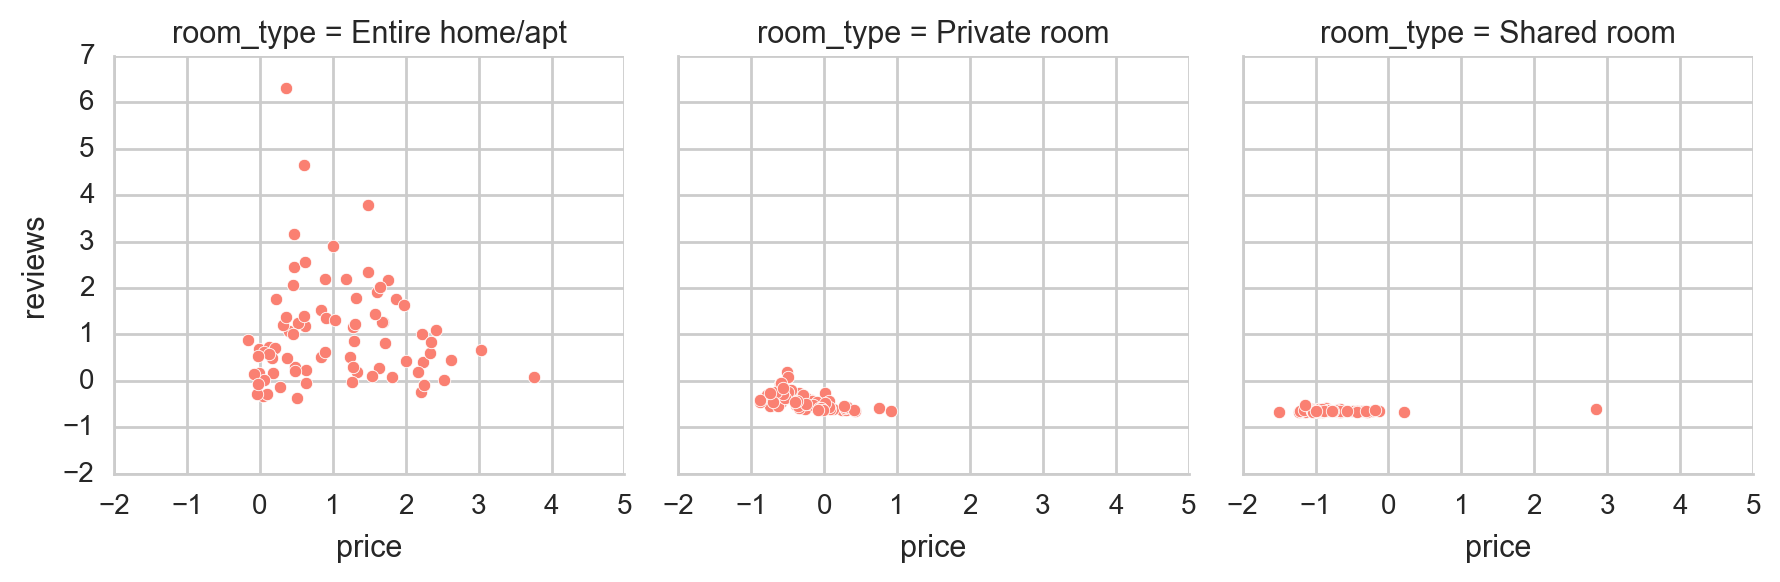

In [29]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [30]:
# fig, axis_array = plt.subplots(1,2, figsize=(12,4)) # figure with one row and 2 columns within fig. Subplots
# axis1, axis2 = axis_array[0], axis_array[1]

# axis1 = sns.boxplot(data = boston.rate_of_crime, ax=axis1)

# axis2 = sns.boxplot(data = boston.business_zone_pact, ax=axis2)

# axis1.set_xlim(low-1, high+1)
# axis1.set_xlabel('Outcome', fontsize=16)
# axis1.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
# axis1.vlines(x, 0, dist.pmf(x), colors='darkred', lw=8, alpha=0.8) # plots vertical lines
# axis1.set_ylim(0, max(dist.pmf(x))+0.03)
    
# plt.title(title+'\n', fontsize=20)
# plt.show()

# axis1.set_title('Rate of crime boxplot', fontsize=20)

# axis2.set_title('Business zone pct bloxplot', fontsize=20)

# plt.show()

In [31]:
df2_corr = df2.corr()
df2_corr

reviews   host_id     price
reviews  1.000000  0.929686  0.550641
host_id  0.929686  1.000000  0.508552
price    0.550641  0.508552  1.000000

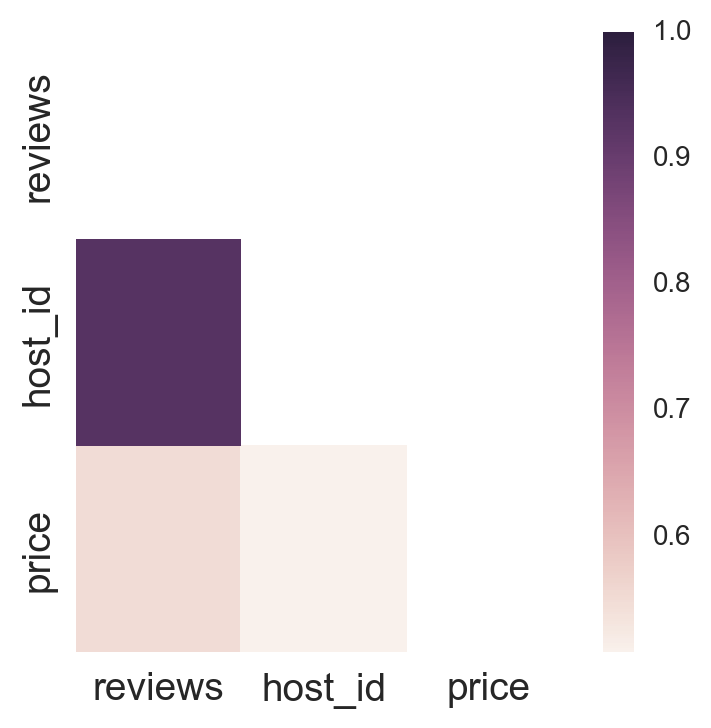

In [32]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(4,4)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df2_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [33]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(paris.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [34]:
neighborhood_data.reset_index(inplace =True)

In [35]:
neighborhood_data.head()

neighborhood  reviews  host_id       price  longitude   latitude
0         Amerique     3682      478   84.248954   2.392708  48.880535
1         Archives    10223      448  161.102679   2.363390  48.859274
2          Arsenal     7145      386  156.284974   2.365218  48.853021
3  Arts-et-Metiers    10798      538  134.148699   2.357057  48.866212
4          Auteuil     5000      776  117.974227   2.265234  48.845785

In [36]:
# define price

def price_color(neighborhood_data, row):
    
    if neighborhood_data.ix[row, 'price'] < 100:
        return 'green'
    elif 100 < neighborhood_data.ix[row, 'price'] < 150:
        return 'orange'
    else:
        return 'red'

In [37]:
import folium

In [38]:
paris_map = folium.Map(location=[48.864716, 2.349014])

for each_row in range(neighborhood_data.shape[0]):
     paris_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [39]:
paris_map

In [47]:
import json

# with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/paris.geo.json") as fp:
#     geodata = json.load(fp)

In [48]:
#geodata.keys()

In [49]:
#neighborhoods = geodata['objects']['conseils-quartiers']['geometries']
#[neighborhood['properties']['name'] for neighborhood in neighborhoods]

In [50]:
#len(geodata['arcs'])

In [51]:
with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson") as fp:
    geodata = json.load(fp)

In [52]:
geodata[u'features']

[{u'geometry': {u'coordinates': [[[2.367101341254551, 48.86162755885409],
     [2.367265176116383, 48.86094919413814],
     [2.363560968606968, 48.86147027305098],
     [2.361225279064903, 48.86179542267097],
     [2.359812353799636, 48.862601603581574],
     [2.358758689067378, 48.86315994208899],
     [2.358376790869217, 48.863331544411615],
     [2.358265473420907, 48.86336590690384],
     [2.3584034898810122, 48.86354959975191],
     [2.3588510511819463, 48.864001734507674],
     [2.359335215112276, 48.86442913978287],
     [2.359536635370187, 48.86462500317124],
     [2.35965880809718, 48.86469520766889],
     [2.359761463915734, 48.86475463241963],
     [2.360209979547445, 48.86519024025307],
     [2.360423521765136, 48.865397652293574],
     [2.361658230815508, 48.86658946982246],
     [2.361691016882086, 48.86661673016978],
     [2.36173493401329, 48.86664895128242],
     [2.361785866808545, 48.86668134468954],
     [2.361832283458348, 48.86670705706371],
     [2.36188526105016

In [55]:
neighborhoods = [feature['properties']['l_qu'] for feature in geodata['features']]

In [56]:
coords = [coord['geometry']['coordinates'] for coord in geodata['features']]
#coords

In [57]:
neighborhood_coords = {n: c for n, c in zip(neighborhoods, coords)}

In [58]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns=['neighborhood', 'long_lat'])

In [59]:
#neighborhood_coords.neighborhood.unique()

In [60]:
#neighborhood_coords[u'Vivienne'][0][0]

In [61]:
neighborhood_cntrd = [feature['properties']['geom_x_y'] for feature in geodata['features']]

In [62]:
#neighborhood_cntrd

In [63]:
neighborhood_center = {n: c for n, c in zip(neighborhoods, neighborhood_cntrd)}

In [64]:
neighborhood_center = pd.DataFrame(neighborhood_center.items(), columns=['neighborhood', 'long_lat'])

In [65]:
neighborhood_center['latitude'] = neighborhood_center['long_lat'].map(lambda x:x[0])

In [66]:
neighborhood_center['longitude'] = neighborhood_center['long_lat'].map(lambda x:x[1])

In [67]:
neighborhood_center.drop('long_lat', inplace=True, axis=1)

In [68]:
neighborhood_center.head(2)

neighborhood   latitude  longitude
0  Grandes-Carrières  48.892578   2.334363
1     Champs-Elysées  48.867074   2.308652

In [69]:
neighborhood_center.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [70]:
neighborhood_center = neighborhood_center.reset_index()

In [71]:
#neighborhood_center.neighborhood.unique()

In [72]:
import Levenshtein


In [73]:
import Levenshtein

def ld_match(df1, df2):

    nbr_match = []
    nbr_notmatch = []

    for row in range(df1.shape[0]):
    
        ld = Levenshtein.ratio((df1.ix[row,'neighborhood']),(df2.ix[row,'neighborhood']))

        if ld >= 0.8:
            df2.ix[row,'neighborhood'] = df1.ix[row,'neighborhood']
            nbr_match.append([df2.ix[row,'neighborhood'],ld])
        else:
            nbr_notmatch.append([df1.ix[row,'neighborhood'],df2.ix[row,'neighborhood'],ld])
    
    return nbr_notmatch
        
        
    #print neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'],ld

In [74]:
nbr_notmatch = ld_match(neighborhood_data,neighborhood_center)

In [75]:
nbr_notmatch

[[u'Pere-Lachaise', u'Petit-Montrouge', 0.2857142857142857],
 [u'Petit-Montrouge', u'Picpus', 0.2857142857142857],
 [u'Picpus', u'Place-Vend\xf4me', 0.21052631578947367],
 [u'Place-Vendome', u'Plaine de Monceaux', 0.45161290322580644],
 [u'Plaine-Monceau', u'Plaisance', 0.6086956521739131],
 [u'Plaisance', u'Pont-de-Flandre', 0.4166666666666667],
 [u'Pont-de-Flandre', u'Porte-Dauphine', 0.5517241379310345],
 [u'Porte-Dauphine', u'Porte-Saint-Denis', 0.6451612903225806],
 [u'Porte-Saint-Denis', u'Porte-Saint-Martin', 0.7428571428571429],
 [u'Porte-Saint-Martin', u'P\xe8re-Lachaise', 0.45161290322580644],
 [u'Saint-Avoye', u'Saint-Fargeau', 0.5833333333333334],
 [u'Saint-Fargeau', u'Saint-Georges', 0.6923076923076923],
 [u'Saint-Georges', u'Saint-Germain-des-Pr\xe9s', 0.6285714285714286],
 [u'Saint-Germain-des-Pres', u'Saint-Gervais', 0.6857142857142857],
 [u'Saint-Gervais', u'Saint-Lambert', 0.6153846153846154],
 [u'Saint-Lambert', u'Saint-Merri', 0.6666666666666666],
 [u'Saint-Merri', 

In [76]:
neighborhood_center.neighborhood.replace(u'Place-Vend\xf4me',u'Place-Vendome',inplace=True)
neighborhood_center.neighborhood.replace(u'Plaine de Monceaux',u'Plaine-Monceau',inplace=True)
neighborhood_center.neighborhood.replace(u'P\xe8re-Lachaise',u'Pere-Lachaise',inplace=True)
neighborhood_center.neighborhood.replace(u'Saint-Germain-des-Pr\xe9s',u'Saint-Germain-des-Pres',inplace=True)
neighborhood_center.neighborhood.replace(u"Saint-Thomas-d'Aquin",u'Saint-Thomas-dAquin',inplace=True)
neighborhood_center.neighborhood.replace(u'Sainte-Avoie',u'Saint-Avoye',inplace=True)

In [77]:
neighborhood_center.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [78]:
neighborhood_center = neighborhood_center.reset_index()

In [79]:
neighborhood_match = []
for row in range(len(neighborhoods)):
    
    ld = Levenshtein.ratio((neighborhood_data.ix[row,'neighborhood']),(neighborhood_center.ix[row,'neighborhood']))
    neighborhood_match.append(ld)
    
        
    #print neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'],ld

In [80]:
neighborhood_center['price'] = neighborhood_data['price']

In [81]:
# for row in range(len(neighborhoods)):
    
#     print(neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'])

In [82]:
neighborhood_center.drop([u'level_0',u'index'],inplace =True, axis=1)

In [83]:
neighborhood_center.head(2)

neighborhood   latitude  longitude       price
0     Amerique  48.881638   2.395440   84.248954
1     Archives  48.859192   2.363205  161.102679

In [84]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson'


nbrhd_map = folium.Map(location=[48.864716, 2.349014],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, data=neighborhood_center,columns=['neighborhood','price'],fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [85]:
for each_row in range(neighborhood_center.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_center.ix[each_row,'latitude'],neighborhood_center.ix[each_row,'longitude']],
                            popup = str(neighborhood_center.ix[each_row,'neighborhood'])+" "+str(neighborhood_center.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_center,each_row)
                            
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [86]:
nbrhd_map

In [87]:
paris_metro = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/paris_only_metro_370.csv',sep='#',
                          header = None,names =['year_built','longitude','latitude','station_name','neighborhood','transport_type']
                         )

In [88]:
paris_metro.head(2)

year_built  longitude   latitude station_name neighborhood transport_type
0        1975   2.338713  48.884418     Abbesses  PARIS-18EME          metro
1        1981   2.326746  48.828399       Al̩sia  PARIS-14EME          metro

In [89]:
# adding missing stations

paris_metro.loc[len(paris_metro)] = [1843, 2.35454912540286,48.8800360157373 , u'Gare du Nord', u'PARIS-10EME','rer']
paris_metro.loc[len(paris_metro)] = [1840, 2.37407229997982, 48.844757269576, u'Gare de Lyon', u'PARIS-12EME','rer']
paris_metro.loc[len(paris_metro)] = [1833, 2.270665584, 48.73416373 , u'Massy-Verrières',u'MASSY','rer']

In [90]:
paris_metro.tail()

year_built  longitude   latitude             station_name neighborhood  \
368        5604   2.345018  48.852694  Saint-Michel Notre-Dame  PARIS-05EME   
369        1967   2.346633  48.861149      Chatelet-Les Halles   PARIS-01ER   
370        1843   2.354549  48.880036             Gare du Nord  PARIS-10EME   
371        1840   2.374072  48.844757             Gare de Lyon  PARIS-12EME   
372        1833   2.270666  48.734164          Massy-Verrières        MASSY   

    transport_type  
368            rer  
369            rer  
370            rer  
371            rer  
372            rer

In [91]:
#paris_metro.station_name.unique()

In [92]:
#neighborhood_coords.ix[1,long_lat]

In [93]:
for each_row in range(paris_metro.shape[0]):
     nbrhd_map.circle_marker(location = [paris_metro.ix[each_row,'latitude'],paris_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [94]:
nbrhd_map

In [95]:

#neighborhood_coords.ix[79,u'long_lat'][0]

In [96]:
neighborhood_data.neighborhood.unique()

array([u'Amerique', u'Archives', u'Arsenal', u'Arts-et-Metiers',
       u'Auteuil', u'Batignolles', u'Bel-Air', u'Belleville', u'Bercy',
       u'Bonne-Nouvelle', u'Chaillot', u'Champs-Elysees', u'Charonne',
       u'Chaussee-dAntin', u'Clignancourt', u'Combat', u'Croulebarbe',
       u'Ecole-Militaire', u'Enfants-Rouges', u'Epinettes', u'Europe',
       u'Faubourg-Montmartre', u'Faubourg-du-Roule', u'Folie-Mericourt',
       u'Gaillon', u'Gare', u'Goutte-dOr', u'Grandes-Carrieres',
       u'Grenelle', u'Gros-Caillou', u'Halles', u'Hopital-Saint-Louis',
       u'Invalides', u'Jardin-des-Plantes', u'Javel 15Art', u'La Chapelle',
       u'Madeleine', u'Mail', u'Maison-Blanche', u'Monnaie',
       u'Montparnasse', u'Muette', u'Necker', u'Notre-Dame',
       u'Notre-Dame-des-Champs', u'Odeon', u'Palais-Royal',
       u'Parc-de-Montsouris', u'Pere-Lachaise', u'Petit-Montrouge',
       u'Picpus', u'Place-Vendome', u'Plaine-Monceau', u'Plaisance',
       u'Pont-de-Flandre', u'Porte-Dauphine',

In [97]:
#paris_metro.groupby('neighborhood').agg({'longitude':'count','latitude':'count'})

In [98]:
import shapely
from shapely.geometry import Polygon, Point


        
            


In [363]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = Polygon(polygon_coords.ix[row,u'long_lat'][0])
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

    

In [100]:
#neighborhood_center['neighborhood'].unique()

In [344]:
metrostn_count = pd.DataFrame(dot_count(neighborhood_coords, paris_metro).items(),columns=['neighborhood','stn_count'])

In [345]:
metrostn_count.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [346]:
metrostn_count = metrostn_count.reset_index()

In [347]:
metrostn_count.head(2)

index neighborhood  stn_count
0     53     Amérique          6
1     13     Archives          1

In [348]:
nbrhd_nmatch = ld_match(neighborhood_center, metrostn_count)

In [349]:
nbrhd_nmatch

[[u'Pere-Lachaise', u'Petit-Montrouge', 0.2857142857142857],
 [u'Petit-Montrouge', u'Picpus', 0.2857142857142857],
 [u'Picpus', u'Place-Vend\xf4me', 0.21052631578947367],
 [u'Place-Vendome', u'Plaine de Monceaux', 0.45161290322580644],
 [u'Plaine-Monceau', u'Plaisance', 0.6086956521739131],
 [u'Plaisance', u'Pont-de-Flandre', 0.4166666666666667],
 [u'Pont-de-Flandre', u'Porte-Dauphine', 0.5517241379310345],
 [u'Porte-Dauphine', u'Porte-Saint-Denis', 0.6451612903225806],
 [u'Porte-Saint-Denis', u'Porte-Saint-Martin', 0.7428571428571429],
 [u'Porte-Saint-Martin', u'P\xe8re-Lachaise', 0.45161290322580644],
 [u'Saint-Avoye', u'Saint-Fargeau', 0.5833333333333334],
 [u'Saint-Fargeau', u'Saint-Georges', 0.6923076923076923],
 [u'Saint-Georges', u'Saint-Germain-des-Pr\xe9s', 0.6285714285714286],
 [u'Saint-Germain-des-Pres', u'Saint-Gervais', 0.6857142857142857],
 [u'Saint-Gervais', u'Saint-Lambert', 0.6153846153846154],
 [u'Saint-Lambert', u'Saint-Merri', 0.6666666666666666],
 [u'Saint-Merri', 

In [350]:
metrostn_count.neighborhood.replace(u'Place-Vend\xf4me',u'Place-Vendome',inplace=True)
metrostn_count.neighborhood.replace(u'Plaine de Monceaux',u'Plaine-Monceau',inplace=True)
metrostn_count.neighborhood.replace(u'P\xe8re-Lachaise',u'Pere-Lachaise',inplace=True)
metrostn_count.neighborhood.replace(u'Saint-Germain-des-Pr\xe9s',u'Saint-Germain-des-Pres',inplace=True)
metrostn_count.neighborhood.replace(u"Saint-Thomas-d'Aquin",u'Saint-Thomas-dAquin',inplace=True)
metrostn_count.neighborhood.replace(u'Sainte-Avoie',u'Saint-Avoye',inplace=True)

In [351]:
metrostn_count.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [352]:
metrostn_count = metrostn_count.reset_index()

In [353]:
metrostn_count.head(2)

level_0  index neighborhood  stn_count
0        0     53     Amerique          6
1        1     13     Archives          1

In [111]:
#metrostn_count['neighborhood'][metrostn_count['stn_count']==0]

In [354]:
metrostn_count.drop([u'level_0',u'index'],inplace =True, axis=1)

In [355]:
#metrostn_count.neighborhood

In [356]:
neighborhood_center['metrostn_count'] = metrostn_count['stn_count']

In [357]:
neighborhood_center.head(2)

neighborhood   latitude  longitude       price  metrostn_count  dist_arprt
0     Amerique  48.881638   2.395440   84.248954               6    0.191090
1     Archives  48.859192   2.363205  161.102679               1    0.230147

In [358]:
import math
def Euclidean_distance(point1,point2):
     return math.sqrt((point2.x()-point1.x())**2 + (point2.y()-point1.y())**2)


In [359]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

cdg_loc = (49.0083899664, 2.53844117956)
dist1 = []
dist2 = []
from shapely.geometry import Point
point1 = Point(cdg_loc)

for i in range(neighborhood_center.shape[0]):
    
            point2 = Point(neighborhood_center.ix[i,'latitude'],neighborhood_center.ix[i,'longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [360]:
se = pd.Series(dist2)

In [361]:
neighborhood_center['dist_arprt'] = se.values

In [362]:
neighborhood_center.head()

neighborhood   latitude  longitude       price  metrostn_count  \
0         Amerique  48.881638   2.395440   84.248954               6   
1         Archives  48.859192   2.363205  161.102679               1   
2          Arsenal  48.851585   2.364768  156.284974               1   
3  Arts-et-Metiers  48.866470   2.357083  134.148699               3   
4          Auteuil  48.850622   2.252277  117.974227               9   

   dist_arprt  
0    0.191090  
1    0.230147  
2    0.233987  
3    0.230287  
4    0.326773

In [121]:
#import json

In [309]:
# with open('/Users/Jyots/Desktop/data.json') as fp:

#     generic_dataparis = json.load(fp)

In [310]:
#generic_dataparis['districts'].values()[0]['priceSquare']

In [308]:
# dist_val = generic_dataparis['districts']
# dist_val

In [307]:
# dist_proprice = {feature['id']:feature['priceSquare'] for feature in dist_val.values()}
# dist_proprice

In [126]:
#generic_dataparis['lines']

In [312]:
# w = generic_dataparis['lines'].values()
# #print w
# x = [feature['stations'] for feature in [w[i] for i in range(len(w))]]
# print len(x)

# distmetro_dict = {}

# for i in range(len(x)):
#     q = x[i]
    
#     for j in range(len(q)):
#         #print q
#         distmetro_dict[q.values()[j]['districts']] = q.values()[j]['name']


In [311]:
# metrostn_dist = pd.DataFrame(distmetro_dict.items(),columns=['districts','stn_name'])
# metrostn_dist.head()

In [164]:
#metrostn_dist.sort_values('stn_name', axis=0, ascending=True, inplace=True)

In [165]:
#metrostn_dist = metrostn_dist.reset_index()

In [167]:
#metrostn_dist.drop('index', inplace=True, axis=1)

In [306]:
#metrostn_dist.head()

In [169]:
# metrostn_name =  distmetro_dict.values()
# metrostn_name.sort()
#metrostn_name

In [266]:
# metrostn_name[0] = 'Anatole-France'
# metrostn_name[1] = 'Anvers'
# metrostn_name[2] = 'Argentine'
# metrostn_name[3] = 'Aubervilliers Pantin (4 Chemins)'
# metrostn_name[4] = 'Barbs-Rochechouart'
# metrostn_name[5] = 'Bastille'
# metrostn_name[6] = 'Belleville'
# metrostn_name[7] = 'Bobigny-Pablo-Picasso'
# metrostn_name[8] = 'Bobigny-Pantin (Raymond Queneau)'
# metrostn_name[9] = 'Bonne Nouvelle'
# metrostn_name[10] = 'Boulogne-Jean-Jaurs'
# metrostn_name[11] = 'Bourse'
# metrostn_name[12] = 'Berault'
# metrostn_name[13] = 'Cadet'
# metrostn_name[14] = 'Charles de Gaulle-Etoile'
# metrostn_name[15] = 'Chateau de Vincennes'
# metrostn_name[16] = 'Chatelet'
# metrostn_name[17] = 'Chatillon Montrouge'
# metrostn_name[19] = 'Corentin-Celton'
# metrostn_name[20] = 'Couronnes'
# metrostn_name[21] = 'Crteil-L Echat (Hpital Henri Mondor)'
# metrostn_name[23] = 'Esplanade de la D̩fense'
# metrostn_name[26] = "Fort d Aubervilliers"
# metrostn_name[28] = 'Gallieni (Parc de Bagnolet)'
# metrostn_name[29] = 'Goncourt (Hpital Saint-Louis)'
# metrostn_name[32] = 'La Courneuve-8-Mai-1945'
# metrostn_name[33] = 'La Dfense (Grande Arche)'
# metrostn_name[35] = 'La Chapelle'
# metrostn_name[36] = 'Le Kremlin-Bictre'
# metrostn_name[37] = 'Les Agnettes'
# metrostn_name[38] = 'Les Gobelins'
# metrostn_name[39] = "Les Sablons (Jardin d acclimatation)"
# metrostn_name[40] = 'Libert'
# metrostn_name[41] = 'Louis Blanc'
# metrostn_name[42] = 'Mairie de Clichy'
# metrostn_name[43] = 'Mairie de Montrouge'
# metrostn_name[44] = 'Mairie de Saint-Ouen'
# metrostn_name[45] = 'Mairie des Lilas'
# metrostn_name[46] = 'Malakoff-Plateau de Vanves'
# metrostn_name[47] = 'Malakoff-Rue Etienne Dolet'
# metrostn_name[48] = 'Montparnasse-Bienvenue'
# metrostn_name[49] = 'Nation'
# metrostn_name[50] = 'Odon'
# metrostn_name[51] = 'Opra'
# metrostn_name[52] = 'Pelleport'
# metrostn_name[53] = 'Pierre et Marie Curie'
# metrostn_name[54] = "Place d Italie"
# metrostn_name[55] = 'Place de Clichy'
# metrostn_name[56] = 'Poissonnire'
# metrostn_name[57] = 'Pont Marie (Cit des Arts)'
# metrostn_name[58] = 'Porte de Clignancourt'
# metrostn_name[59] = 'Porte de Vincennes'
# metrostn_name[60] = 'Porte des Lilas'
# metrostn_name[61] = 'Pyramides'
# metrostn_name[62] = 'Quai de la Rap̩e'
# metrostn_name[63] = 'Rambuteau'
# metrostn_name[64] = 'Richard-Lenoir'
# metrostn_name[65] = 'Riquet'
# metrostn_name[66] = 'Robespierre'
# metrostn_name[67] = 'Rome'
# metrostn_name[68] = 'Raumur-Sbastopol'
# metrostn_name[69] = 'Rpublique'
# metrostn_name[70] = 'Saint-Denis-Universite'
# metrostn_name[71] = 'Saint-Jacques'
# metrostn_name[72] = 'Saint-Lazare'
# metrostn_name[73] = 'Saint-Mand'
# metrostn_name[74] = 'Saint-Michel'
# metrostn_name[75] = 'Solfrino'
# metrostn_name[76] = 'Stalingrad'
# metrostn_name[77] = 'Strasbourg-Saint-Denis'
# metrostn_name[78] = 'Svres-Babylone'
# metrostn_name[79] = 'Svres-Lecourbe'
# metrostn_name[80] = 'Sgur'
# metrostn_name[81] = 'Temple'
# metrostn_name[82] = 'Trocad̩ro'
# metrostn_name[83] = 'Vavin'
# metrostn_name[84] = 'Villejuif-Paul Vaillant Couturier (Hpital Paul Brousse)'
# metrostn_name[85] = 'Wagram'
# metrostn_name[86] = 'Maisons-Alfort-Les Juilliottes'
# metrostn_name[87] = 'Marcel Sembat'

In [267]:
# for row in range(metrostn_dist.shape[0]):
#     metrostn_dist.ix[row,'stn_name'] = metrostn_name[row]

In [294]:
# coordinates = {}

# for station in metrostn_dist.stn_name:
#     for row in range(paris_metro.shape[0]):
#         if station == paris_metro.ix[row,'station_name']:
#             #print station, paris_metro.ix[row,'station_name']
#             coordinates[paris_metro.ix[row,'station_name']] = [paris_metro.ix[row,'latitude'],paris_metro.ix[row,'longitude']]




/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [275]:
#coordinates.values()

In [276]:
#metrostn_coords = pd.DataFrame(coordinates.items(),columns=['stn_name','coordinate'])

In [289]:
#metrostn_dist.stn_name.unique()

In [290]:
#paris_metro

In [303]:
#dist_prop = pd.DataFrame(dist_proprice.items(),columns=['district_num','prop_price'])
#dist_prop

In [304]:
#metrostn_dist

In [243]:
#metrostn_coords.ix[0,'coordinate']

In [192]:
#paris_metro.head()

In [280]:
# path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson'


# proprice_map = folium.Map(location=[48.864716, 2.349014],
#                     zoom_start=12)
# proprice_map.choropleth(geo_path=path,fill_opacity =0.2, line_opacity=0.8, line_weight=2)




In [298]:
# for each_row in range(metrostn_coords.shape[0]):
#      proprice_map.circle_marker(location = [metrostn_coords.ix[each_row,'coordinate'][0],metrostn_coords.ix[each_row,'coordinate'][1]] ,
#                          radius = 50,fill_color = 'blue',line_color = 'blue')
                            

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [305]:
#proprice_map

In [ ]:
import xmltodict

In [260]:
with open("/Users/Jyots/Downloads/Paris by Mouth Restaurants.kml") as fp:

    rd = xmltodict.parse(fp)

In [261]:
rd

OrderedDict([(u'kml',
              OrderedDict([(u'@xmlns', u'http://www.opengis.net/kml/2.2'),
                           (u'Document',
                            OrderedDict([(u'name',
                                          u'Paris by Mouth: Restaurants'),
                                         (u'description', None),
                                         (u'Folder',
                                          OrderedDict([(u'name',
                                                        u'Untitled layer'),
                                                       (u'Placemark',
                                                        [OrderedDict([(u'name',
                                                                       u"L'Abeille"),
                                                                      (u'description',
                                                                       u"Address: 10 avenue d'I\xe9na, 75016<br>Nearest transport: I\xe9na (9)<br>Hours: D

In [301]:
rest_dict = {}

for point in rd['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [364]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

rest_name                 coordinates
0       Au Passage  [2.368229, 48.861438, 0.0]
1  Le Cul de Poule  [2.340387, 48.880289, 0.0]

In [365]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [366]:
rest_data.head(2)

rest_name                 coordinates  longitude   latitude
0       Au Passage  [2.368229, 48.861438, 0.0]   2.368229  48.861438
1  Le Cul de Poule  [2.340387, 48.880289, 0.0]   2.340387  48.880289

In [381]:
rest_count = pd.DataFrame(dot_count(neighborhood_coords, rest_data).items(), columns=['neighborhood','restaurants'])
#rest_count

In [382]:
rest_count.sort_values('neighborhood',ascending=True, inplace=True, axis= 0)

In [383]:
rest_count= rest_count.reset_index()

In [384]:
rest_count.head(2)

index neighborhood  restaurants
0     53     Amérique            1
1     13     Archives            5

In [385]:
neighborhood_center['rest_count'] = rest_count['restaurants']

In [389]:
neighborhood_center['review_count'] = neighborhood_data['reviews']
neighborhood_center['host_count'] = neighborhood_data['host_id']

In [390]:
neighborhood_center.head()

neighborhood   latitude  longitude       price  metrostn_count  \
0         Amerique  48.881638   2.395440   84.248954               6   
1         Archives  48.859192   2.363205  161.102679               1   
2          Arsenal  48.851585   2.364768  156.284974               1   
3  Arts-et-Metiers  48.866470   2.357083  134.148699               3   
4          Auteuil  48.850622   2.252277  117.974227               9   

   dist_arprt  rest_count  review_count  host_count  
0    0.191090           1          3682         478  
1    0.230147           5         10223         448  
2    0.233987           2          7145         386  
3    0.230287           3         10798         538  
4    0.326773           0          5000         776

In [335]:
#float(rest_data.ix[each_row,'coordinates'][0]),rest_data.ix[each_row,'coordinates'][1]

In [340]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson'


restaurant_map = folium.Map(location=[48.864716, 2.349014],
                    zoom_start=12)
restaurant_map.choropleth(geo_path=path, fill_opacity =0.1, line_opacity=0.8, line_weight=2)




In [341]:
for each_row in range(neighborhood_center.shape[0]):
     restaurant_map.simple_marker(location = [neighborhood_center.ix[each_row,'latitude'],neighborhood_center.ix[each_row,'longitude']],
                            popup = str(neighborhood_center.ix[each_row,'neighborhood'])+" "+str(neighborhood_center.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_center,each_row)
                            
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [368]:
for each_row in range(rest_data.shape[0]):
     restaurant_map.circle_marker(location = [rest_data.ix[each_row,'latitude'],rest_data.ix[each_row,'longitude']],
                         radius = 50,fill_color = '#ff0080',line_color = '#ff0080')
                            

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [369]:
restaurant_map